### [ Scatter(산정도) 1Plot 살펴보기 ]  
- 용도: 2개 이상의 컬럼들의 관계 정도를 시각화 하는 그래프
- corr() : 

In [44]:
import pandas as pd
import numpy as np

In [45]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


In [46]:
df.corr(numeric_only=True, min_periods=3)

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued diZscrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

(2) 데이터 준비 <hr>

In [47]:
file = '../DATA/auto-mpg.data.csv'

(3) 데이터 저장 : CSV => DataFrame <hr>

In [48]:
mpgDF=pd.read_csv(file, sep='\s+',names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])
mpgDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


(4) 데이터 정보 확인 <hr>

- 전체 데이터 간략 정보 확인 => info()

In [49]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- 실제 데이터의 값의 종류 즉 고유값 확인 => unique()/nunique()
      * 각 컬럼의 이상한 값 즉, 이상치 확인
      * 각 컬럼의 값의 종류 및 범위
      * 각 컬럼의 실제 데이터 타입

In [50]:
for col in mpgDF.columns:
    print(f'[{col}]=============')
    print(mpgDF[col].nunique(), mpgDF[col].unique(),sep='\n', end='\n\n')

[mpg]=============
129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[cylinders]=============
5
[8 4 6 3 5]

[displacement]=============
82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108

In [51]:
# dropna 파라미터 설정으로 컬럼의 데이터 수치까지 확인 가능 
mpgDF['origin'].nunique(dropna=False), mpgDF['origin'].unique() # dropna 사용시 결측값이 있으면 na까지 계산해서 나온다 ,True/False뭐가 다르지?

(3, array([1, 3, 2], dtype=int64))

(5) 데이터 전처리 <hr>

- 결측치 체크 => 꼭 NaN이 아닐 수 있음
- 중복값 체크
- 이상치 체크 => 컬럼 범위를 벗어난 값, 잘못 입력된 값
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

(5-1) 결측치 체크 및 처리 ==> 이상한 값 즉 이상치 NaN으로 변환 후 처리

In [52]:
mpgDF.horsepower.value_counts()['?'] #물음표 => NaN으로 변경

6

In [53]:
mpgDF['horsepower'].replace('?',np.nan,inplace=True) 

In [54]:
mpgDF.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [55]:
mpgDF.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


(5-2) 데이터 표준화 => horsepower의 자료형을 실제 데이터와 일치

In [56]:
mpgDF.horsepower=mpgDF.horsepower.astype('float32')

In [57]:
mpgDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

(5-2) 데이터 표준화 => 연속형 즉 수치 자료형-----> 범주형 자료형 변환
- 46~230 범위 실수 수치값 ==> 저출력/중출력/고출력

In [58]:
mpgDF.horsepower.describe()

count    392.000000
mean     104.469391
std       38.491138
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [59]:
pd.cut(np.array([1,7,5,4,6,3]),3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [60]:
pd.cut(np.array([1,7,5,4,6,3]),3, labels=['A', 'B', 'C'])

['A', 'C', 'B', 'B', 'C', 'A']
Categories (3, object): ['A' < 'B' < 'C']

In [61]:
pd.cut(np.array([1,7,5,4,6,3]),3, labels=['초영아', '영아', '유아'])

['초영아', '유아', '영아', '영아', '유아', '초영아']
Categories (3, object): ['초영아' < '영아' < '유아']

In [62]:
out, ret=pd.cut(mpgDF.horsepower, bins=3, labels=['저마력', '중마력', '고마력'], retbins=True)
type(out), ret

(pandas.core.series.Series,
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [63]:
mpgDF['horsepower']=out
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin             int64
car name          object
dtype: object

In [64]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [65]:
pd.get_dummies(s) # 2진수로 바꿔줌 

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


(5-3) 데이터 표준화 => 범주형 ==> 연속형/수치화 변환 : One-Hot-Encoding 형식

In [66]:
# pandas.get_dummies() 함수
# mpgDF에 origin 컬럼을 변환 => 1,2,3 범주행

In [67]:
pd.get_dummies(mpgDF.origin)

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
393,True,False,False
394,False,True,False
395,True,False,False
396,True,False,False


In [68]:
# pandas.get_dummies() 함수
# mpgDF에 origin 컬럼을 변환 => "USA", "EU", "JPN" 변환

In [69]:
mpgDF['origin'].replace({1:"USA", 2: "EU", 3: "JPN"})

0      USA
1      USA
2      USA
3      USA
4      USA
      ... 
393    USA
394     EU
395    USA
396    USA
397    USA
Name: origin, Length: 398, dtype: object

In [70]:
mpgDF['origin']=mpgDF['origin'].astype("category")
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

(6) 데이터분석 <hr>
(6-1) 연비 mpg컬럼과 관계가 가장 높은 컬럼

In [71]:
# 상관계수 수치화 확인 ---------------------------------------------
corrDF=mpgDF.corr(numeric_only=True)
corrDF['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [72]:
corrDF['mpg'][1:].sort_values()

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

### 시각화로 연비 mpg 컬럼의 관계 확인

In [75]:
import matplotlib.pyplot as plt

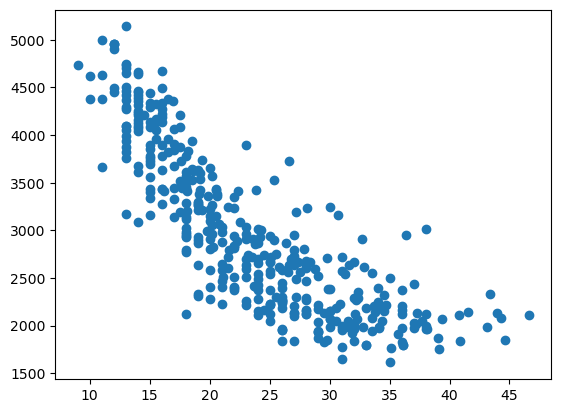

In [79]:
plt.scatter(mpgDF['mpg'],mpgDF['weight'])

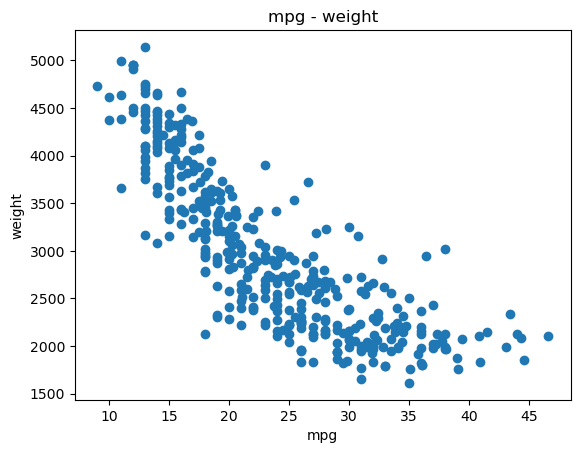

In [85]:
def scatterplot(sr1, sr2):
    plt.scatter(sr1, sr2)
    plt.title(f'{sr1.name} - {sr2.name}')
    plt.xlabel(f'{sr1.name}')
    plt.ylabel(f'{sr2.name}')
    plt.show

scatterplot(mpgDF['mpg'],mpgDF['weight'])

In [86]:
def printscatter(col1, col2):
    plt.scatter(mpgDF[col1], mpgDF[col2])
    plt.title(f'[{col1} - {col2}:{corrDF[col1][col2]}]')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


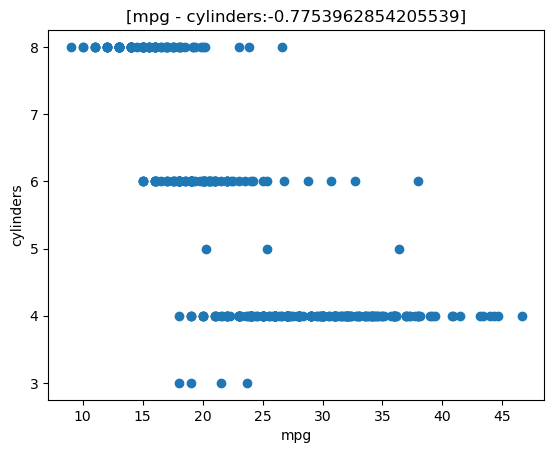

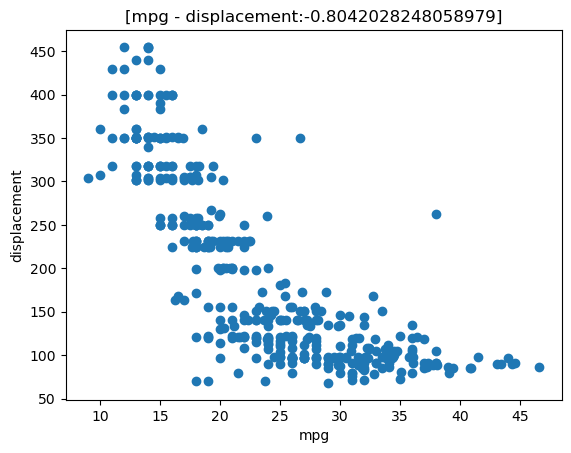

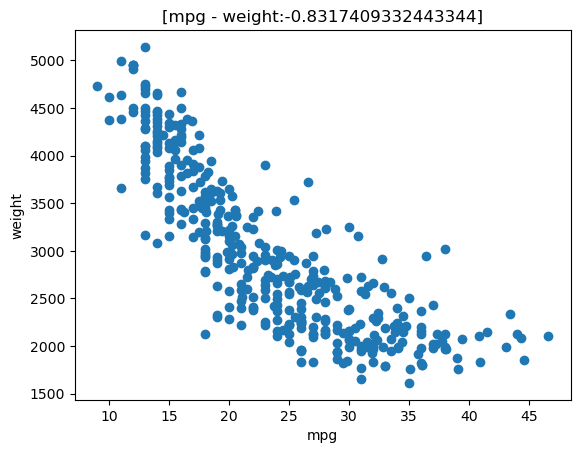

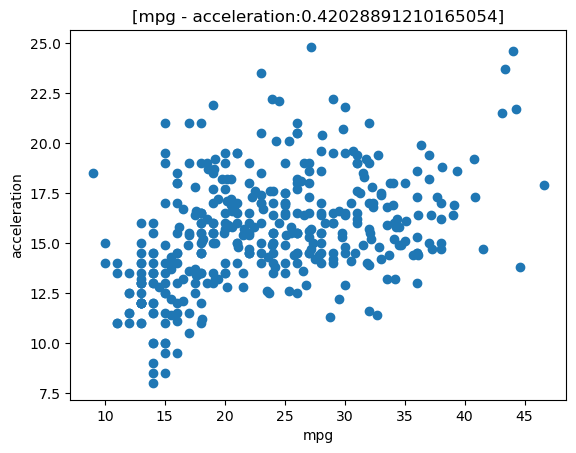

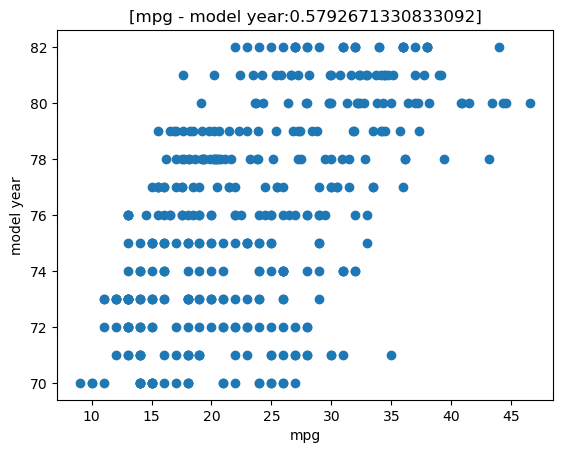

In [87]:
for col in corrDF.columns[1:]:
    printscatter('mpg',col)

(6-2) 자동차 제조사의 데이터 비율

In [90]:
originSR=mpgDF['origin'].value_counts()
originSR.index, originSR.values

(CategoricalIndex([1, 3, 2], categories=[1, 2, 3], ordered=False, dtype='category', name='origin'),
 array([249,  79,  70], dtype=int64))

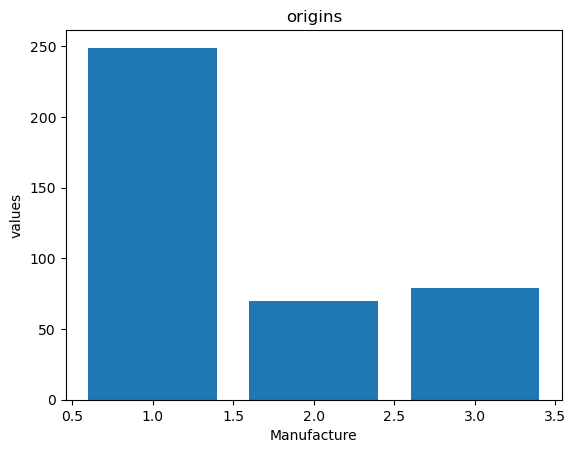

In [91]:
plt.bar(originSR.index, originSR.values)
plt.title('origins')
plt.xlabel('Manufacture')
plt.ylabel('values')
plt.show()

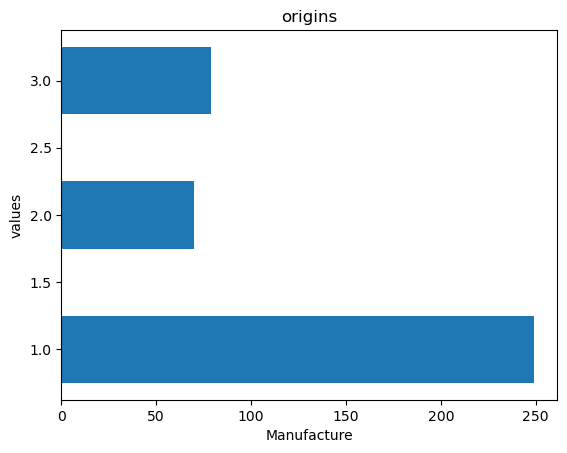

In [92]:
plt.barh(originSR.index, originSR.values, height=0.5)
plt.title('origins')
plt.xlabel('Manufacture')
plt.ylabel('values')
plt.show()

In [ ]:
colors = mpgDF['mpg']
plt.scatter[mpgDF

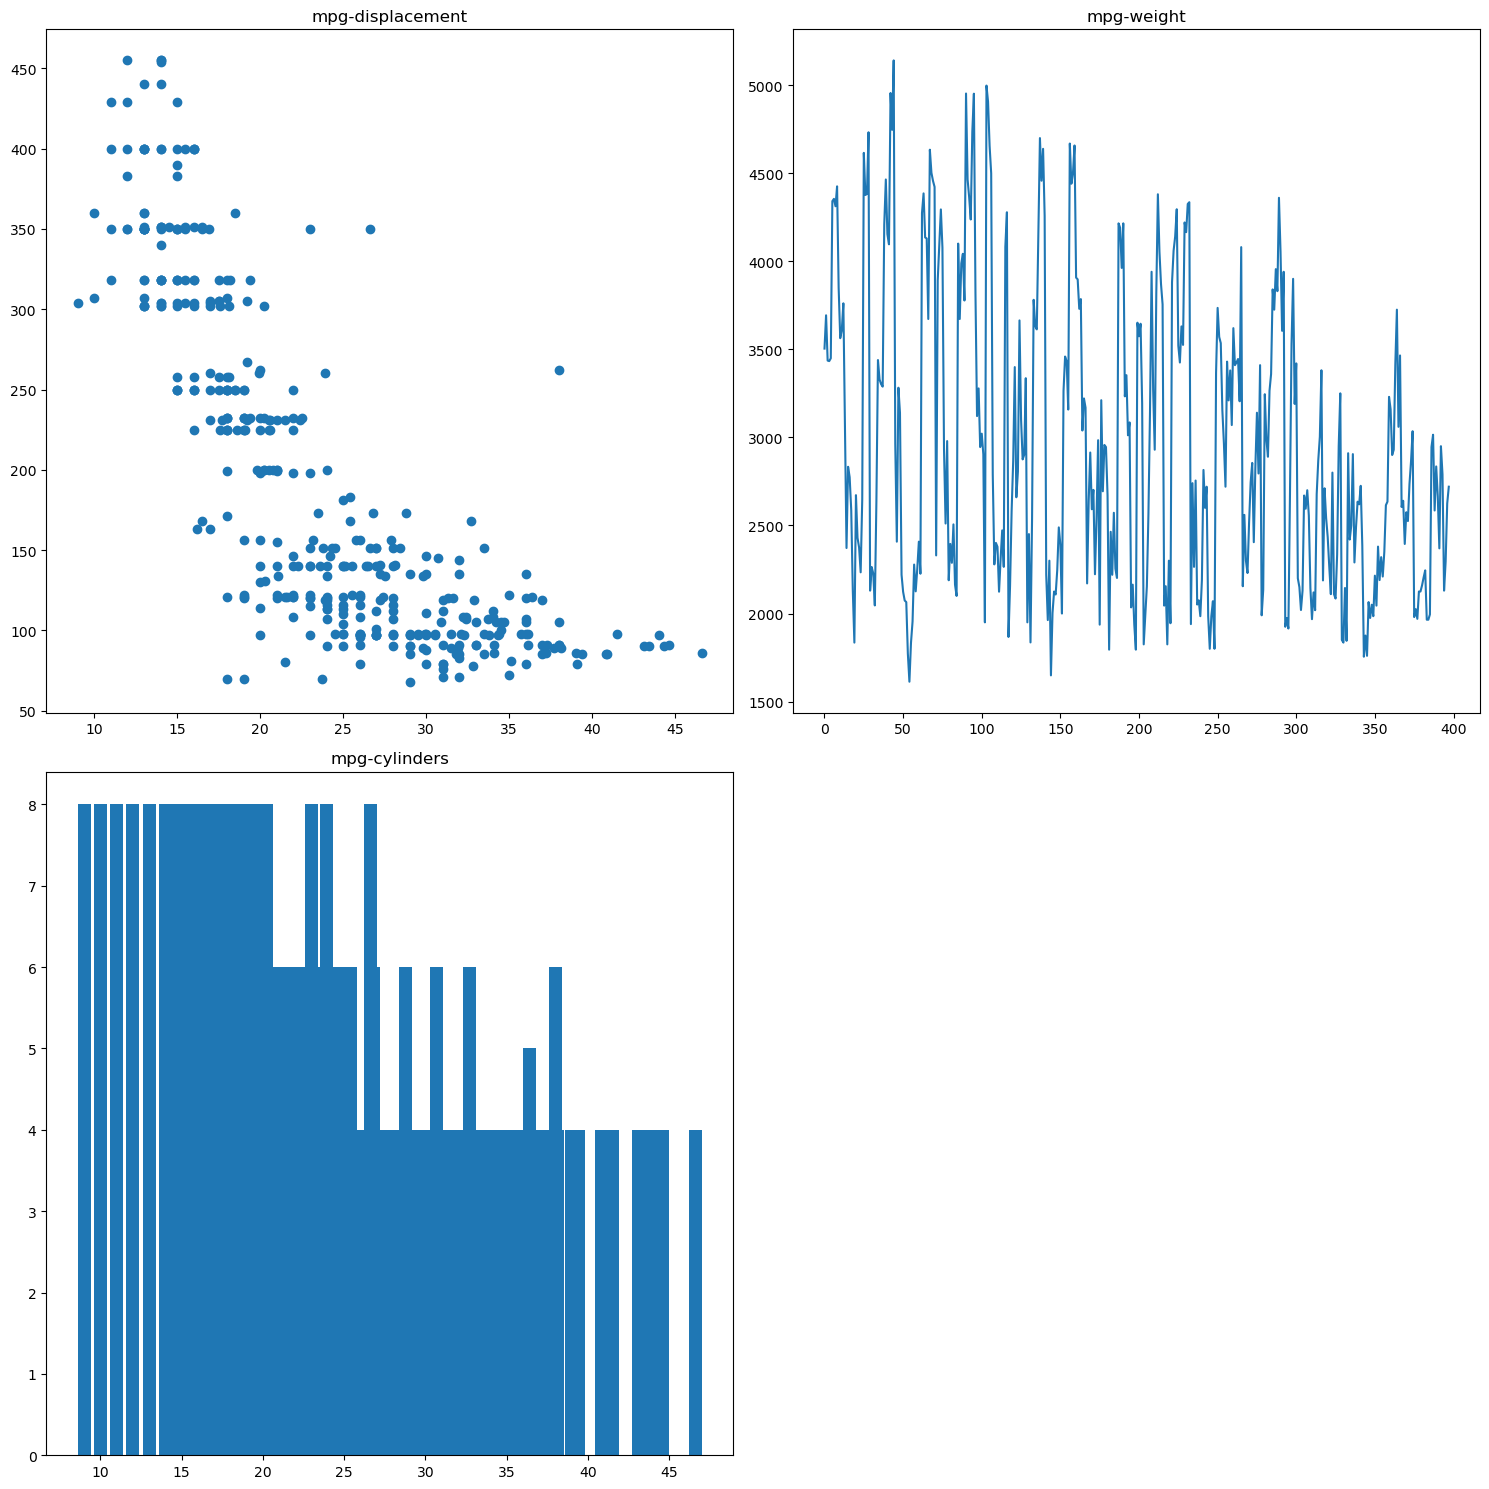

In [93]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)        #2행 2열 중 첫 번째
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title("mpg-displacement")

plt.subplot(2,2,2)          # 2행 2열 중 두 번째
plt.plot(mpgDF['weight'])
plt.title("mpg-weight")

plt.subplot(2,2,3)          # 2행 2열 중 세 번째
plt.bar(mpgDF['mpg'], mpgDF['cylinders'])
plt.title("mpg-cylinders")

plt.tight_layout() # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수
plt.show()

 방법 1) fig.ax= plt.subplots()
- 방법 2) plt.subplot(행, 열, 인), plt.subplot(3, 1, 1), plt.subplot(3, 1, 2), plt.subplot(3, 1, 3))

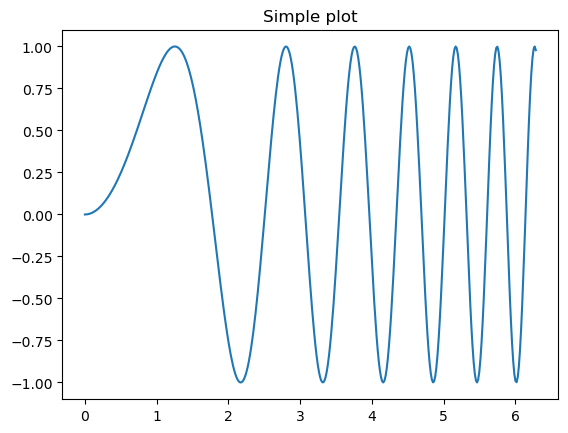

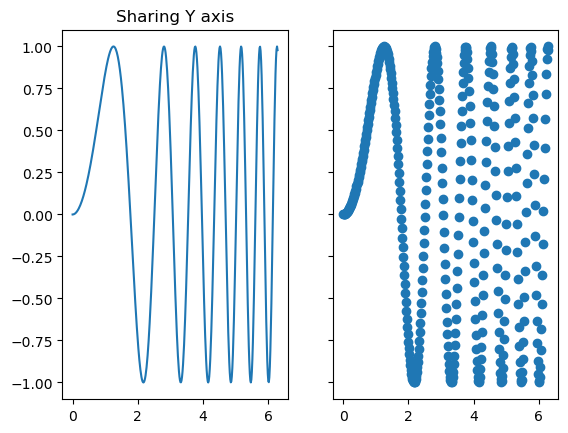

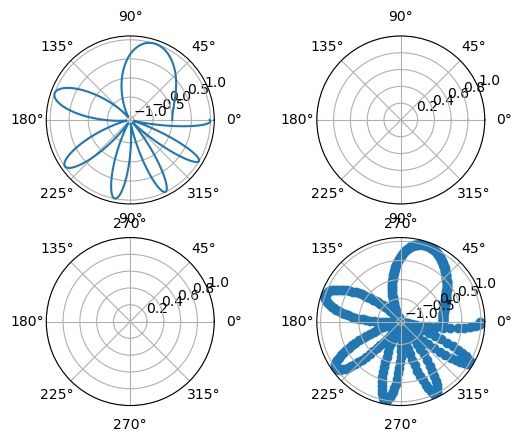

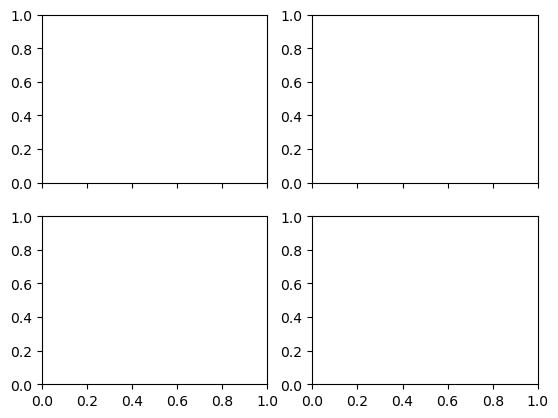

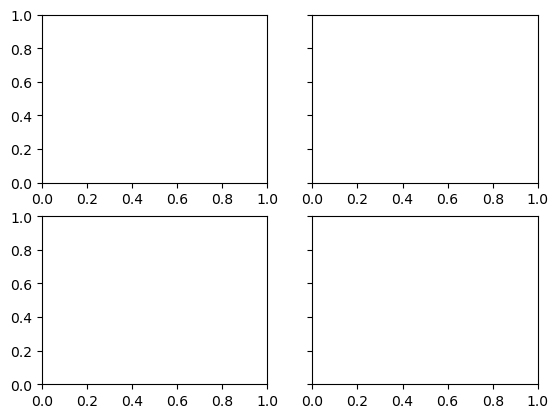

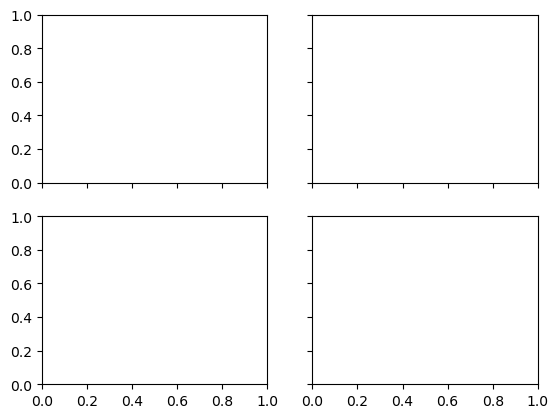

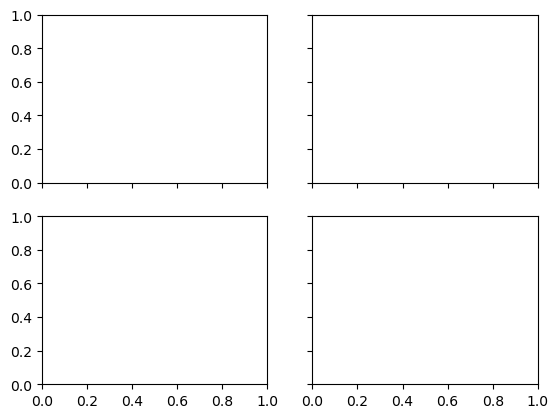

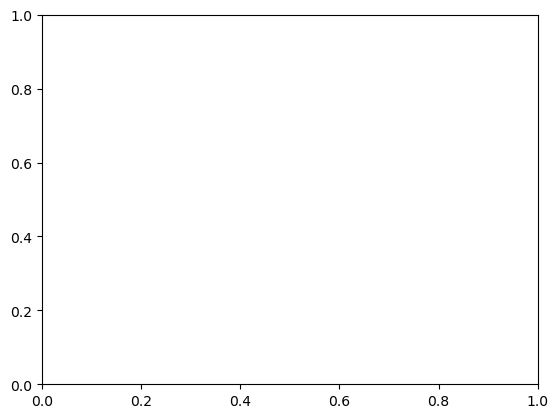

In [95]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

ValueError: The Axes must have been created in the present figure

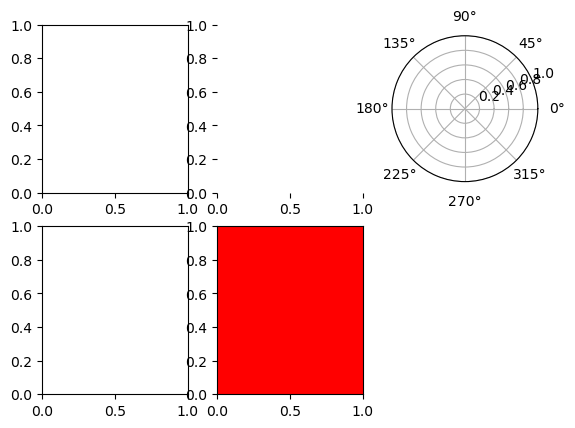

In [96]:
fig = plt.figure()

fig.add_subplot(231)
ax1 = fig.add_subplot(2, 3, 1)  # equivalent but more general

fig.add_subplot(232, frameon=False)  # subplot with no frame
fig.add_subplot(233, projection='polar')  # polar subplot
fig.add_subplot(234, sharex=ax1)  # subplot sharing x-axis with ax1
fig.add_subplot(235, facecolor="red")  # red subplot

ax1.remove()  # delete ax1 from the figure
fig.add_subplot(ax1)  # add ax1 back to the figure